In [2]:
!wget 	http://blpd13.ssl.berkeley.edu/dl/GBT_58402_66623_NGC5238_mid.h5


--2020-03-21 21:30:45--  http://blpd13.ssl.berkeley.edu/dl/GBT_58402_66623_NGC5238_mid.h5
Resolving blpd13.ssl.berkeley.edu (blpd13.ssl.berkeley.edu)... 208.68.240.55
Connecting to blpd13.ssl.berkeley.edu (blpd13.ssl.berkeley.edu)|208.68.240.55|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 242300762 (231M) [application/octet-stream]
Saving to: ‘GBT_58402_66623_NGC5238_mid.h5.1’

       GBT_58402_66  26%[====>               ]  62.27M   104MB/s               ^C


In [3]:
# !pip install blimpy 
import tensorflow as tf 
import keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, ConvLSTM2D
from keras.layers.core import Activation, Flatten
import matplotlib.pyplot as plt
from keras.optimizers import SGD,RMSprop,adam
from keras.models import load_model
from sklearn.utils import shuffle
from keras.losses import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import os, os.path
import numpy as np
import tempfile
from keras.layers import Reshape
from keras import losses
from keras.layers.advanced_activations import LeakyReLU 
from keras.activations import sigmoid
from scipy.io import wavfile
from keras.layers import Input, LSTM, MaxPooling1D, Conv1D
from keras.models import Model
from keras import backend as K
from keras.layers.convolutional import Convolution1D
from keras.layers import  Conv2D, MaxPool3D, MaxPooling2D, TimeDistributed, Embedding, Convolution2D , Lambda
from keras.layers import BatchNormalization
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix
import pylab as plt
from blimpy import Waterfall
from keras.layers import Reshape, Conv2DTranspose, BatchNormalization, ZeroPadding2D
from astropy import units as u
from keras.layers import Softmax
from  keras.backend import expand_dims
# !pip install setigen 
from random import seed
from random import random
from astropy import units as u
import setigen as stg

Using TensorFlow backend.


In [4]:
from preprocessing import DataProcessing as dp
from synthetic import synthetic as synth 
direct = ['/content/GBT_58402_66623_NGC5238_mid.h5',
          '/content/GBT_58402_66623_NGC5238_mid.h5',
          '/content/GBT_58402_66623_NGC5238_mid.h5'
          ]
dp = dp()
X_train_unsupervised, X_test_unsupervised = dp.load_multiple_files(list_directory=direct)
syth = synth()
X_train_supervised, X_test_supervised, y_train_supervised, y_test_supervised  = syth.generate(total_num_samples= 5000, data = X_train_unsupervised)

single Data load Execution: 7.655982732772827 Sec
single Data load Execution: 1.2795677185058594 Sec
single Data load Execution: 1.1205339431762695 Sec
(10000, 2)
(10000, 32, 1, 32)
Synethtic Generation Execution Time: 6.876758098602295


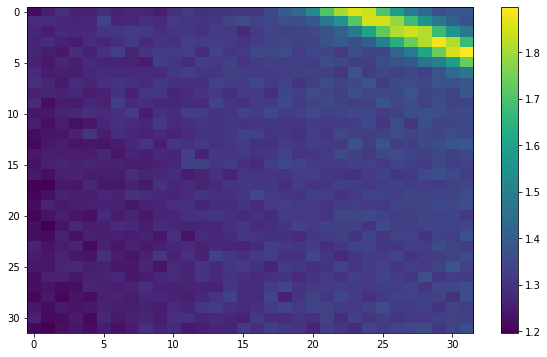

In [5]:
%matplotlib inline
fig = plt.figure(figsize=(10, 6))
plt.imshow(X_train_supervised[11,:,0,:], aspect='auto')
plt.colorbar()

In [3]:
from model import model as model1 

mod = model1(latent_dim=64, kernel_size=(3,3), data_shape=X_train_unsupervised[0].shape, layer_filters =[32,64,128], CuDNNLSTM=True)
encode = mod.encoder()
feature_classification = mod.feature_classification()
latent_encode = mod.latent_encode()
decoder = mod.decoder()

inputs = Input(shape=X_train_unsupervised[0].shape, name='input')

encoder_final = Model(inputs, feature_classification(encode(inputs)), name='encoder_training')

AutoEncoder= Model(inputs, decoder(latent_encode(encode(inputs))), name='autoencoder')






tensorflow      WARNING  From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.


tensorflow      WARNING  From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.


tensorflow      WARNING  From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4479: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.


tensorflow      WARNING  From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.


tensorflow      WARNING  From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:197: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigP

In [6]:
from train import train 
inputs = Input(shape=X_train_unsupervised[0].shape, name='input')
train_obj = train()
train = train_obj.train_model( epoch=5, inputs=inputs, encode = encode, feature_encode=feature_classification, 
              decoder=decoder, latent_encode=latent_encode
              , X_train_unsupervised=X_train_unsupervised
              , X_test_unsupervised=X_test_unsupervised
              , X_train_supervised=X_train_supervised
              , X_test_supervised=X_test_supervised
              , y_train_supervised=y_train_supervised,
              y_test_supervised=y_test_supervised)



tensorflow      WARNING  From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.


tensorflow      WARNING  From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3657: The name tf.log is deprecated. Please use tf.math.log instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
tensorflow      WARNING  From /tensorflow-1.15.0/python3.6/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
--------------ENCODER TRAIN--------------0

tensorflow      WARNING  From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.


tensorf

In [0]:
from save_model import save_model 

save = save_model()
save.save(train)

In [9]:
from classification import predict 
predict = predict(anchor = X_test_supervised, test=X_test_supervised, model_location="/content/encoder_injected_model (1).h5")
values = predict.compute_distance()


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Text(0, 0.5, 'Euclidean Distance')

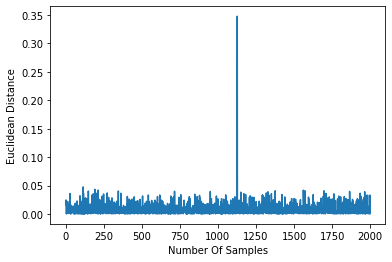

In [10]:
%matplotlib inline

plt.plot(values)
plt.xlabel("Number Of Samples")
plt.ylabel("Euclidean Distance")

In [11]:
print(predict.max_index(5))

[1127, 115, 192, 214, 1561]


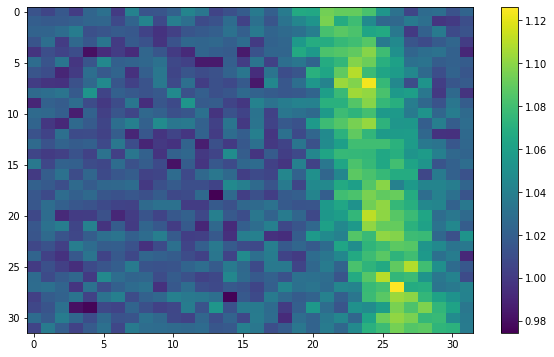

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(10, 6))
plt.imshow(X_train_supervised[predict.max_index(1)[0],:,0,:], aspect='auto')
plt.colorbar()